In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
cleaned_data = pd.read_csv(cleaned_dataset_path)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7298 - loss: 0.8320 - val_accuracy: 0.7518 - val_loss: 0.7167
Epoch 2/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7513 - loss: 0.7130 - val_accuracy: 0.7518 - val_loss: 0.6947
Epoch 3/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7482 - loss: 0.6995 - val_accuracy: 0.7518 - val_loss: 0.6896
Epoch 4/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7493 - loss: 0.6954 - val_accuracy: 0.7518 - val_loss: 0.6880
Epoch 5/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7539 - loss: 0.6852 - val_accuracy: 0.7518 - val_loss: 0.6875
Epoch 6/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7470 - loss: 0.6964 - val_accuracy: 0.7518 - val_loss: 0.6874
Epoch 7/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7501 - loss: 0.6902 - val_accuracy: 0.7518 - val_loss: 0.6877
Epoch 8/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7495 - loss: 0.6920 - val_accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.7518
Precision: 0.5652
Recall: 0.7518
F1 Score: 0.6453


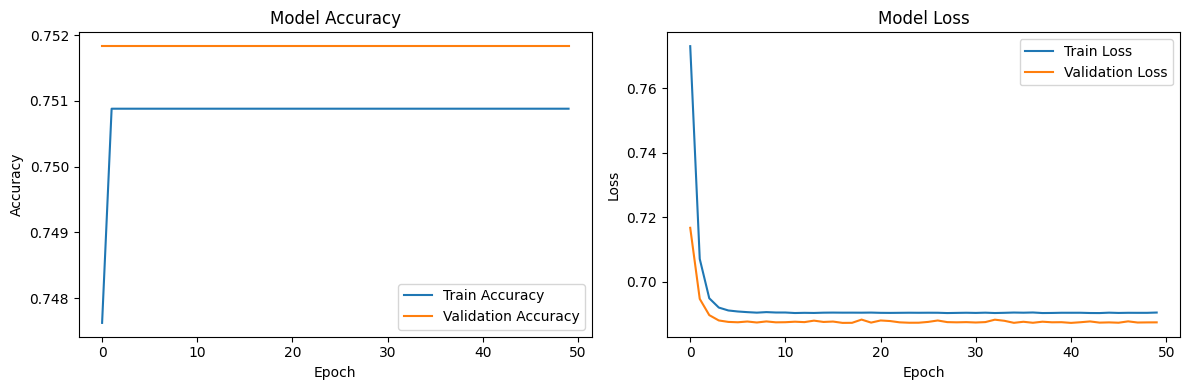

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/ML Mental Health Monitoring System/data.csv')

# Define features and target
features = [
    'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
    'Skin_Temperature', 'Respiration_Rate', 'Sleep_Duration',
    'Activity_Levels', 'Mood', 'Stress_Level', 'Resilience_Factors'
]
target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# One-hot encode the target variable
y_encoded = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network with regularization
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(y_train.shape[1], activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


XG Boost Updated

Class distribution before balancing: [39495 10324  2766]
Class distribution after balancing: [31596 31596 31596]
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:36:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Training Metrics (after SMOTE):
Accuracy: 0.6193
Precision: 0.6192
Recall: 0.6193
F1 Score: 0.6121

Testing Metrics:
Accuracy: 0.5292
Precision: 0.6015
Recall: 0.5292
F1 Score: 0.5608

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.75      0.65      0.69      7899
Moderate Stress       0.19      0.18      0.18      2065
     Depression       0.06      0.18      0.09       553

       accuracy                           0.53     10517
      macro avg       0.33      0.33      0.32     10517
   weighted avg       0.60      0.53      0.56     10517



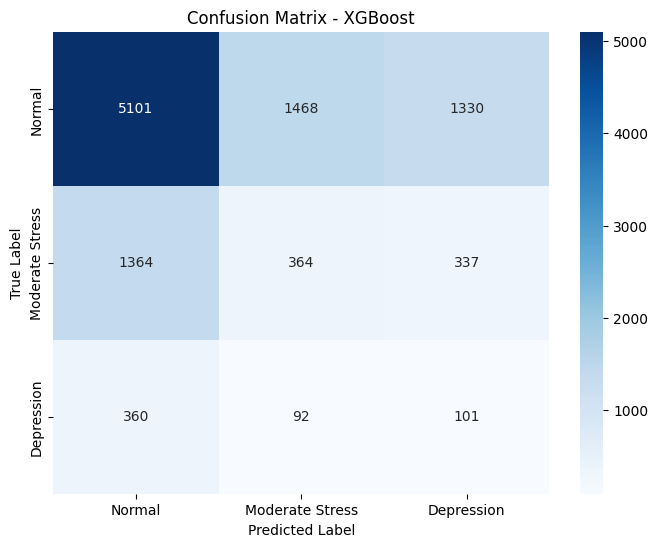

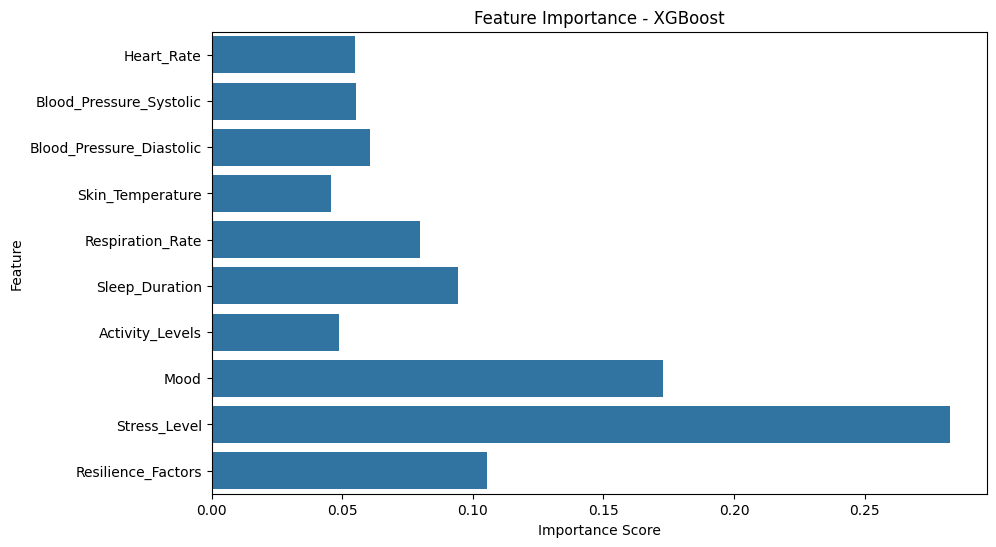

In [ ]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]

target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# Handle Missing Values
X = X.fillna(X.median())

# Encode Categorical Variables in Features
categorical_columns = ['Mood', 'Stress_Level']
for col in categorical_columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = LabelEncoder().fit_transform(X[col])

# Encode the target variable
if y.dtype == 'object' or y.dtype.name == 'category':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
else:
    # If already numeric, ensure they are integers 0,1,2:
    y_encoded = y.astype(int).values

# Define class names
class_names = ['Normal', 'Moderate Stress', 'Depression']

# Check class distribution
class_counts = np.bincount(y_encoded)
print("Class distribution before balancing:", class_counts)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=100, stratify=y_encoded
)

# Apply SMOTE to handle class imbalance on the training set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
class_counts_res = np.bincount(y_train_res)
print("Class distribution after balancing:", class_counts_res)

# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# XGBoost model with multiclass objective
xgb_model = XGBClassifier(
    random_state=100,
    objective='multi:softprob',  # multiclass objective
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Parameter Grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search for Hyperparameter Tuning with a balanced metric
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1_weighted',  # focus on balanced performance
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train_res)

# Best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test = best_xgb_model.predict(X_test_scaled)

# Evaluate Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train_res, y_pred_train),
    "Precision": precision_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "Recall": recall_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_train_res, y_pred_train, average='weighted', zero_division=0)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
}

print(f"Best Parameters: {best_params_xgb}")
print("\nTraining Metrics (after SMOTE):")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=class_names, zero_division=0))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
importance = best_xgb_model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Improved Code